In [1]:
# Classifier imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier

# Performance metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support

import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LinearRegression
import matplotlib.pyplot as plt

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.
import pandas as pd

# Train-test Split since dataset is not split yet
from sklearn.model_selection import train_test_split

pc_worker_sem_df = pd.read_csv('data/kokil dec 6 reprepare/conf_pc_worker_sem.csv')
pc_worker_sem_df = pc_worker_sem_df.dropna() # dataset contains NaN values, dropping NaNs here

X = pc_worker_sem_df.loc[: , "'": ]
y_gamelabel = pc_worker_sem_df.loc[: , "Answer.1gamemove.yes_label"]
y_reasoning = pc_worker_sem_df.loc[: , "Answer.2reasoning.yes_label"]
y_rapport = pc_worker_sem_df.loc[: , "Answer.3rapport.yes_label"]
y_shareinformation = pc_worker_sem_df.loc[: , "Answer.4shareinformation.yes_label"]

y_deception = pc_worker_sem_df["Input.deception_quadrant"].apply(lambda x : 1 if x == "Straightforward" else 0)

y_dict = {'gamelabel': y_gamelabel, 'reasoning': y_reasoning, 'rapport': y_rapport, 'shareinformation': y_shareinformation, 'deception': y_deception}

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.
import pandas as pd

# Train-test Split since dataset is not split yet
from sklearn.model_selection import train_test_split

pc_worker_sem_df = pd.read_csv('data/kokil dec 6 reprepare/conf_pc_worker_sem.csv')
pc_worker_sem_df = pc_worker_sem_df.dropna() # dataset contains NaN values, dropping NaNs here

X = pc_worker_sem_df.loc[: , "'": ]
y_gamelabel = pc_worker_sem_df.loc[: , "Answer.1gamemove.yes_label"]
y_reasoning = pc_worker_sem_df.loc[: , "Answer.2reasoning.yes_label"]
y_rapport = pc_worker_sem_df.loc[: , "Answer.3rapport.yes_label"]
y_shareinformation = pc_worker_sem_df.loc[: , "Answer.4shareinformation.yes_label"]

input_deception = pc_worker_sem_df["Input.deception_quadrant"].copy()
input_deception = pc_worker_sem_df["Input.deception_quadrant"].apply(lambda x : 1 if x == "Straightforward" else 0)
y_deception = input_deception.to_list()

# X = (X - X.mean()) / X.std()
# X = (X - X.min()) / (X.max() - X.min())

y_dict = {'gamelabel': y_gamelabel, 'reasoning': y_reasoning, 'rapport': y_rapport, 'shareinformation': y_shareinformation, 'deception': y_deception}

## Features Selection Test with predicting Rapport
Reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [27]:
y = y_dict['shareinformation']
x1, x2, y1, y2 = train_test_split(X, y, test_size=0.2)
test_df = pd.DataFrame(y1).join(x1)
test_df.describe()

,Answer.4shareinformation.yes_label,',' ',-,- lrb,- lrb -,- rrb,- rrb -,$,$ .,...,prt,punct,purpcl,quantmod,rcmod,rel,root,tmod,xcomp,xsubj
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,0.841839,0.001160,0.000611,0.006532,0.001570,0.001638,0.001836,0.001924,0.012540,0.000836,...,0.133964,0.000330,0.002200,0.007699,0.098658,0.006929,0.903982,0.021117,0.548394,0.243511
std,0.364912,0.010725,0.005682,0.030279,0.007918,0.008313,0.008909,0.009413,0.026124,0.007815,...,0.357338,0.018163,0.046852,0.103540,0.326059,0.082957,0.294633,0.148303,0.743224,0.476123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,0.166667,0.090909,0.285714,0.100000,0.111111,0.100000,0.111111,0.181818,0.125000,...,3.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,5.000000,3.000000


In [43]:
x1.shape, y1.shape

((9092, 801), (9092,))

### Filter method
This method yielded 0 features.

In [6]:
# Using Pearson Correlation
# plt.figure(figsize=(12,10))
cor = test_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["Answer.2reasoning.yes_label"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

KeyboardInterrupt: 

### Wrapper Method
This method yielded 34 features.

In [28]:
X = test_df.drop("Answer.4shareinformation.yes_label",1)   #Feature Matrix
y = test_df["Answer.4shareinformation.yes_label"]          #Target Variable

# Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
# Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const    0.014422
'        0.886257
' '      0.864422
-        0.828803
- lrb    0.647666
           ...   
rel      0.955105
root     0.675139
tmod     0.747842
xcomp    0.331992
xsubj    0.451000
Length: 802, dtype: float64

In [29]:
# Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['$ vbp', ',', '. cc', '. jj', '. to', 'cc to', 'cc vbp', 'dt jj', 'in to', 'in vb', 'jj nns', 'md .', 'md to', 'nn prp $', 'nn prp rb', 'nn rb prp', 'nn vbn', 'nn vbp', 'nnp nnp nnp', 'nnp nns', 'nnp vbn', 'prp .', 'prp nn prp', 'prp rb prp', 'prp vbp', 'rb prp $', 'rb prp prp', 'rp', 'to ,', 'uh', 'vb in', 'vb rb prp', 'vb vbg', 'vbg in', 'vbp jj', 'vbp to', 'vbz .', '[conj_and', '[nsubjpass', '[number', '[parataxis', '[prep_between', '[prep_my', '[prepc_based_on', '[prepc_by', 'abbrev', 'conj_and\\\\\\\\/or', 'conj_nor', 'nn.y', 'prep_about', 'prep_from', 'prep_incompatible', 'prep_near', 'prep_starting', 'prepc_against', 'prepc_at', 'prepc_because', 'prepc_close_to', 'prepc_down', 'prepc_off', 'prepc_out_of', 'prepc_regarding', 'prepc_than', 'prepc_through']


In [8]:
rapport_features = ['- lrb', '- lrb -', ',', 'cc nnp', 'cc prp vb', 'cc to', 'in dt nn', 'in prp $', 'lrb', 'lrb -', 'nn jj', 'nn prp vbp', 'nn rb prp', 'nnp nns', 'nns in', 'rb vbz', 'vb . to', 'vb prp prp', 'vb to', 'vbn vb', 'vbp dt', '[conj_and', '[conj_but', '[number', '[parataxis', '[prep_oh', '[prep_regarding', '[prepc_between', 'abbrev', 'advcl', 'ccomp', 'prep_above', 'prep_including', 'prep_off']
len(rapport_features)

34

### Embedded Method
This method yielded 1 feature.

Best alpha using built-in LassoCV: 0.008022
Best score using built-in LassoCV: 0.000000
Lasso picked 1 variables and eliminated the other 800 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

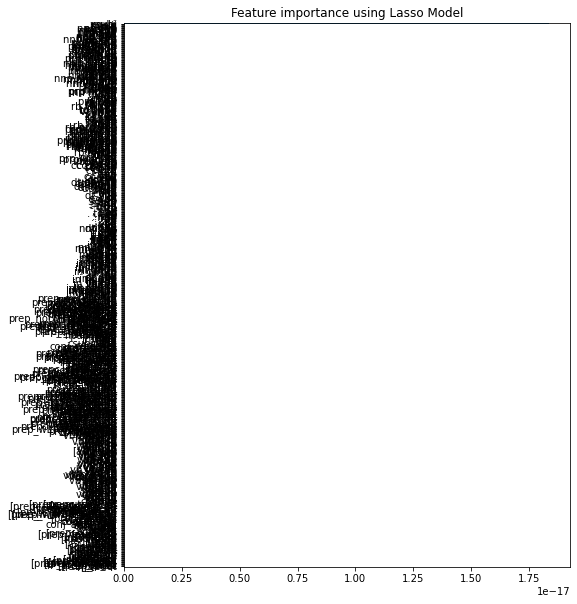

In [35]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Traditional ML methods predicting every feature
Reference: https://www.kaggle.com/paul92s/linear-svc-classifier

In [22]:
# Initialize our classifiers
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier()
SVC = SVC()
LSVC = LinearSVC()
NSVC = NuSVC()
RFC = RandomForestClassifier(max_depth=2, random_state=0)

In [23]:
for key in y_dict.keys():
    print(key)
    y = y_dict[key]
    
    x1, x2, y1, y2 = train_test_split(X, y, test_size=0.2)
    
    gnb.fit(x1, y1)
    y2_GNB_model = gnb.predict(x2)
    print("GaussianNB Accuracy :")
    print(classification_report(y2, y2_GNB_model))
    print(precision_recall_fscore_support(y2, y2_GNB_model, average='macro'))

    KNN.fit(x1,y1)
    y2_KNN_model = KNN.predict(x2)
    print("KNN Accuracy :")
    print(classification_report(y2, y2_KNN_model))
    print(precision_recall_fscore_support(y2, y2_KNN_model, average='macro'))

    MNB.fit(x1,y1)
    y2_MNB_model = MNB.predict(x2)
    print("MNB Accuracy :")
    print(classification_report(y2, y2_MNB_model))
    print(precision_recall_fscore_support(y2, y2_MNB_model, average='macro'))

    BNB.fit(x1,y1)
    y2_BNB_model = BNB.predict(x2)
    print("BNB Accuracy :")
    print(classification_report(y2, y2_BNB_model))
    print(precision_recall_fscore_support(y2, y2_BNB_model, average='macro'))

    LR.fit(x1,y1)
    y2_LR_model = LR.predict(x2)
    print("LR Accuracy :")
    print(classification_report(y2, y2_LR_model))
    print(precision_recall_fscore_support(y2, y2_LR_model, average='macro'))

    SDG.fit(x1,y1)
    y2_SDG_model = SDG.predict(x2)
    print("SGD Accuracy :")
    print(classification_report(y2, y2_SDG_model))
    print(precision_recall_fscore_support(y2, y2_SDG_model, average='macro'))

    SVC.fit(x1,y1)
    
    y2_SVC_model = SVC.predict(x2)
    print("SVC Accuracy :")
    print(classification_report(y2, y2_SVC_model))
    print(precision_recall_fscore_support(y2, y2_SVC_model, average='macro'))

    LSVC.fit(x1,y1)
    y2_LSVC_model = LSVC.predict(x2)
    print("LSVC Accuracy :")
    print(classification_report(y2, y2_LSVC_model))
    print(precision_recall_fscore_support(y2, y2_LSVC_model, average='macro'))

    
    RFC.fit(x1,y1)
    y2_RFC_model = RFC.predict(x2)
    print("RFC Accuracy :")
    print(classification_report(y2, y2_RFC_model))
    print(precision_recall_fscore_support(y2, y2_RFC_model, average='macro'))

gamelabel
GaussianNB Accuracy :
              precision    recall  f1-score   support

         0.0       0.07      0.93      0.13       160
         1.0       0.90      0.05      0.09      2114

    accuracy                           0.11      2274
   macro avg       0.49      0.49      0.11      2274
weighted avg       0.84      0.11      0.09      2274

(0.4853516915554381, 0.4895133632923368, 0.10954168611035658, None)
KNN Accuracy :
              precision    recall  f1-score   support

         0.0       0.10      0.11      0.10       160
         1.0       0.93      0.92      0.93      2114

    accuracy                           0.86      2274
   macro avg       0.51      0.52      0.52      2274
weighted avg       0.87      0.86      0.87      2274

(0.5146610947951302, 0.5167514191106907, 0.5154144555131428, None)
MNB Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       160
         1.0       0.93      1.00      0

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       160
         1.0       0.93      1.00      0.96      2114

    accuracy                           0.93      2274
   macro avg       0.46      0.50      0.48      2274
weighted avg       0.86      0.93      0.90      2274

(0.4648197009674582, 0.5, 0.48176845943482227, None)
SGD Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       160
         1.0       0.93      1.00      0.96      2114

    accuracy                           0.93      2274
   macro avg       0.46      0.50      0.48      2274
weighted avg       0.86      0.93      0.90      2274

(0.4648197009674582, 0.5, 0.48176845943482227, None)


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       160
         1.0       0.93      1.00      0.96      2114

    accuracy                           0.93      2274
   macro avg       0.46      0.50      0.48      2274
weighted avg       0.86      0.93      0.90      2274

(0.4648197009674582, 0.5, 0.48176845943482227, None)


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LSVC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       160
         1.0       0.93      1.00      0.96      2114

    accuracy                           0.93      2274
   macro avg       0.46      0.50      0.48      2274
weighted avg       0.86      0.93      0.90      2274

(0.46480422349318085, 0.49976348155156103, 0.4816503305219968, None)
RFC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       160
         1.0       0.93      1.00      0.96      2114

    accuracy                           0.93      2274
   macro avg       0.46      0.50      0.48      2274
weighted avg       0.86      0.93      0.90      2274

(0.4648197009674582, 0.5, 0.48176845943482227, None)
reasoning


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB Accuracy :
              precision    recall  f1-score   support

         0.0       0.16      0.97      0.28       373
         1.0       0.79      0.03      0.05      1901

    accuracy                           0.18      2274
   macro avg       0.48      0.50      0.16      2274
weighted avg       0.69      0.18      0.09      2274

(0.4782365230126424, 0.4957246997135697, 0.16477713392142151, None)
KNN Accuracy :
              precision    recall  f1-score   support

         0.0       0.19      0.19      0.19       373
         1.0       0.84      0.84      0.84      1901

    accuracy                           0.73      2274
   macro avg       0.52      0.52      0.52      2274
weighted avg       0.73      0.73      0.73      2274

(0.5154461018857304, 0.5154793653121752, 0.515462534167187, None)
MNB Accuracy :
              precision    recall  f1-score   support

         0.0       0.25      0.01      0.02       373
         1.0       0.84      0.99      0.91      19

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       373
         1.0       0.84      1.00      0.91      1901

    accuracy                           0.84      2274
   macro avg       0.42      0.50      0.46      2274
weighted avg       0.70      0.84      0.76      2274

(0.41798592788038696, 0.5, 0.45532934131736524, None)
SGD Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       373
         1.0       0.84      1.00      0.91      1901

    accuracy                           0.84      2274
   macro avg       0.42      0.50      0.46      2274
weighted avg       0.70      0.84      0.76      2274

(0.4179498460184778, 0.4997369805365597, 0.45519885002395777, None)
SVC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       373
         1.0       0.84      1.00      0.91      1901

    accuracy    

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LSVC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       373
         1.0       0.84      1.00      0.91      1901

    accuracy                           0.83      2274
   macro avg       0.42      0.50      0.45      2274
weighted avg       0.70      0.83      0.76      2274

(0.41784140969163, 0.49894792214623884, 0.45480700071925195, None)
RFC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       373
         1.0       0.84      1.00      0.91      1901

    accuracy                           0.84      2274
   macro avg       0.42      0.50      0.46      2274
weighted avg       0.70      0.84      0.76      2274

(0.41798592788038696, 0.5, 0.45532934131736524, None)
rapport


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB Accuracy :
              precision    recall  f1-score   support

         0.0       0.14      0.97      0.25       322
         1.0       0.83      0.03      0.05      1952

    accuracy                           0.16      2274
   macro avg       0.49      0.50      0.15      2274
weighted avg       0.73      0.16      0.08      2274

(0.48568313119332746, 0.4970232791976377, 0.14734588458786096, None)
KNN Accuracy :
              precision    recall  f1-score   support

         0.0       0.16      0.17      0.16       322
         1.0       0.86      0.85      0.86      1952

    accuracy                           0.76      2274
   macro avg       0.51      0.51      0.51      2274
weighted avg       0.76      0.76      0.76      2274

(0.509856588682749, 0.5103365874147235, 0.5100193923723336, None)
MNB Accuracy :
              precision    recall  f1-score   support

         0.0       0.27      0.01      0.02       322
         1.0       0.86      1.00      0.92      1

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       322
         1.0       0.86      1.00      0.92      1952

    accuracy                           0.86      2274
   macro avg       0.43      0.50      0.46      2274
weighted avg       0.74      0.86      0.79      2274

(0.4291996481970097, 0.5, 0.4619025082820634, None)
SGD Accuracy :
              precision    recall  f1-score   support

         0.0       0.14      0.00      0.01       322
         1.0       0.86      1.00      0.92      1952

    accuracy                           0.86      2274
   macro avg       0.50      0.50      0.46      2274
weighted avg       0.76      0.86      0.79      2274

(0.5006301594303358, 0.5000159097851543, 0.46428625461168205, None)
SVC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       322
         1.0       0.86      1.00      0.92      1952

    accuracy      

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LSVC Accuracy :
              precision    recall  f1-score   support

         0.0       0.33      0.00      0.01       322
         1.0       0.86      1.00      0.92      1952

    accuracy                           0.86      2274
   macro avg       0.60      0.50      0.46      2274
weighted avg       0.78      0.86      0.79      2274

(0.5959929546455306, 0.5010404999490887, 0.46483396783183667, None)
RFC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       322
         1.0       0.86      1.00      0.92      1952

    accuracy                           0.86      2274
   macro avg       0.43      0.50      0.46      2274
weighted avg       0.74      0.86      0.79      2274

(0.4291996481970097, 0.5, 0.4619025082820634, None)
shareinformation


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB Accuracy :
              precision    recall  f1-score   support

         0.0       0.16      0.98      0.28       369
         1.0       0.85      0.03      0.05      1905

    accuracy                           0.18      2274
   macro avg       0.50      0.50      0.16      2274
weighted avg       0.74      0.18      0.09      2274

(0.5049929219114665, 0.500928237628833, 0.1647771339214215, None)
KNN Accuracy :
              precision    recall  f1-score   support

         0.0       0.18      0.18      0.18       369
         1.0       0.84      0.84      0.84      1905

    accuracy                           0.73      2274
   macro avg       0.51      0.51      0.51      2274
weighted avg       0.73      0.73      0.73      2274

(0.5125585506215892, 0.512613362354096, 0.5125851692028163, None)
MNB Accuracy :
              precision    recall  f1-score   support

         0.0       0.41      0.02      0.04       369
         1.0       0.84      0.99      0.91      1905

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       369
         1.0       0.84      1.00      0.91      1905

    accuracy                           0.84      2274
   macro avg       0.42      0.50      0.46      2274
weighted avg       0.70      0.84      0.76      2274

(0.4188297404311483, 0.49973753280839894, 0.4557204404021063, None)
SGD Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       369
         1.0       0.84      1.00      0.91      1905

    accuracy                           0.84      2274
   macro avg       0.42      0.50      0.46      2274
weighted avg       0.70      0.84      0.76      2274

(0.41879401408450706, 0.4994750656167979, 0.4555901364615753, None)
SVC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       369
         1.0       0.84      1.00      0.91      1905

  

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LSVC Accuracy :
              precision    recall  f1-score   support

         0.0       0.25      0.01      0.01       369
         1.0       0.84      1.00      0.91      1905

    accuracy                           0.84      2274
   macro avg       0.54      0.50      0.46      2274
weighted avg       0.74      0.84      0.76      2274

(0.5440203000882613, 0.5011352239506647, 0.460591541825679, None)
RFC Accuracy :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       369
         1.0       0.84      1.00      0.91      1905

    accuracy                           0.84      2274
   macro avg       0.42      0.50      0.46      2274
weighted avg       0.70      0.84      0.76      2274

(0.4188654353562005, 0.5, 0.45585068198133527, None)
deception


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB Accuracy :
              precision    recall  f1-score   support

           0       0.05      0.94      0.09       101
           1       0.98      0.12      0.22      2173

    accuracy                           0.16      2274
   macro avg       0.51      0.53      0.15      2274
weighted avg       0.94      0.16      0.21      2274

(0.5126968619615678, 0.5315027360996569, 0.15396701761141693, None)
KNN Accuracy :
              precision    recall  f1-score   support

           0       0.10      0.10      0.10       101
           1       0.96      0.96      0.96      2173

    accuracy                           0.92      2274
   macro avg       0.53      0.53      0.53      2274
weighted avg       0.92      0.92      0.92      2274

(0.5295855102751654, 0.5290263494826243, 0.5293008279668814, None)
MNB Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.96      1.00      0.98      2

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.96      1.00      0.98      2173

    accuracy                           0.96      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.91      0.96      0.93      2274

(0.477792436235708, 0.5, 0.4886440296829323, None)
SGD Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.96      1.00      0.98      2173

    accuracy                           0.96      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.91      0.96      0.93      2274

(0.477792436235708, 0.5, 0.4886440296829323, None)


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.96      1.00      0.98      2173

    accuracy                           0.96      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.91      0.96      0.93      2274

(0.477792436235708, 0.5, 0.4886440296829323, None)


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LSVC Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.96      1.00      0.98      2173

    accuracy                           0.96      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.91      0.96      0.93      2274

(0.477792436235708, 0.5, 0.4886440296829323, None)
RFC Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.96      1.00      0.98      2173

    accuracy                           0.96      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.91      0.96      0.93      2274

(0.477792436235708, 0.5, 0.4886440296829323, None)


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Test with features selected for predicting Rapport

In [9]:
X = pc_worker_sem_df.loc[: , "'": ]
y = y_dict['deception']
x1, x2, y1, y2 = train_test_split(X, y, test_size=0.2)

In [46]:
x1.describe()

,',' ',-,- lrb,- lrb -,- rrb,- rrb -,$,$ .,$ in,...,prt,punct,purpcl,quantmod,rcmod,rel,root,tmod,xcomp,xsubj
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,0.001209,0.000637,0.006459,0.001534,0.001601,0.001836,0.001925,0.012565,0.000815,0.001928,...,0.129454,0.000440,0.002200,0.007809,0.102288,0.007369,0.905521,0.019138,0.546744,0.244721
std,0.010989,0.005826,0.030314,0.007881,0.008282,0.008976,0.009489,0.026196,0.007695,0.011114,...,0.351409,0.020971,0.046852,0.106155,0.330809,0.085531,0.292510,0.141752,0.742145,0.478615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.166667,0.090909,0.285714,0.100000,0.111111,0.100000,0.111111,0.181818,0.125000,0.125000,...,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,5.000000,3.000000


In [10]:
x1_test = x1.loc[:, x1.columns.intersection(rapport_features)]
x2_test = x2.loc[:, x2.columns.intersection(rapport_features)]

In [48]:
x1_test.describe()

,- lrb,- lrb -,",",cc nnp,cc prp vb,cc to,in dt nn,in prp $,lrb,lrb -,...,[parataxis,[prep_oh,[prep_regarding,[prepc_between,abbrev,advcl,ccomp,prep_above,prep_including,prep_off
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.0,9092.000000,9092.000000
mean,0.001534,0.001601,0.024233,0.002564,0.000617,0.000694,0.000859,0.000836,0.001472,0.001534,...,0.000110,0.000110,0.000220,0.000110,0.000110,0.292345,0.478003,0.0,0.000110,0.003080
std,0.007881,0.008282,0.030245,0.013475,0.005919,0.007185,0.008507,0.007563,0.007524,0.007881,...,0.010487,0.010487,0.014831,0.010487,0.010487,0.536937,0.721360,0.0,0.010487,0.055412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000
max,0.100000,0.111111,0.153846,0.181818,0.125000,0.142857,0.166667,0.125000,0.090909,0.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,0.0,1.000000,1.000000


In [11]:
# Initialize our classifiers
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier()
SVC = SVC()
LSVC = LinearSVC()
NSVC = NuSVC()
RFC = RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
gnb.fit(x1, y1)
y2_GNB_model = gnb.predict(x2)
print("GaussianNB Accuracy :")
print(classification_report(y2, y2_GNB_model))
print(precision_recall_fscore_support(y2, y2_GNB_model, average='macro'))

KNN.fit(x1,y1)
y2_KNN_model = KNN.predict(x2)
print("KNN Accuracy :")
print(classification_report(y2, y2_KNN_model))
print(precision_recall_fscore_support(y2, y2_KNN_model, average='macro'))

MNB.fit(x1,y1)
y2_MNB_model = MNB.predict(x2)
print("MNB Accuracy :")
print(classification_report(y2, y2_MNB_model))
print(precision_recall_fscore_support(y2, y2_MNB_model, average='macro'))

BNB.fit(x1,y1)
y2_BNB_model = BNB.predict(x2)
print("BNB Accuracy :")
print(classification_report(y2, y2_BNB_model))
print(precision_recall_fscore_support(y2, y2_BNB_model, average='macro'))

LR.fit(x1,y1)
y2_LR_model = LR.predict(x2)
print("LR Accuracy :")
print(classification_report(y2, y2_LR_model))
print(precision_recall_fscore_support(y2, y2_LR_model, average='macro'))

SDG.fit(x1,y1)
y2_SDG_model = SDG.predict(x2)
print("SGD Accuracy :")
print(classification_report(y2, y2_SDG_model))
print(precision_recall_fscore_support(y2, y2_SDG_model, average='macro'))

SVC.fit(x1,y1)

y2_SVC_model = SVC.predict(x2)
print("SVC Accuracy :")
print(classification_report(y2, y2_SVC_model))
print(precision_recall_fscore_support(y2, y2_SVC_model, average='macro'))

LSVC.fit(x1,y1)
y2_LSVC_model = LSVC.predict(x2)
print("LSVC Accuracy :")
print(classification_report(y2, y2_LSVC_model))
print(precision_recall_fscore_support(y2, y2_LSVC_model, average='macro'))


RFC.fit(x1,y1)
y2_RFC_model = RFC.predict(x2)
print("RFC Accuracy :")
print(classification_report(y2, y2_RFC_model))
print(precision_recall_fscore_support(y2, y2_RFC_model, average='macro'))

GaussianNB Accuracy :
              precision    recall  f1-score   support

           0       0.05      0.91      0.10       113
           1       0.96      0.11      0.20      2161

    accuracy                           0.15      2274
   macro avg       0.51      0.51      0.15      2274
weighted avg       0.91      0.15      0.19      2274

(0.505258255580677, 0.5108193109548594, 0.14694952367145878, None)
KNN Accuracy :
              precision    recall  f1-score   support

           0       0.07      0.07      0.07       113
           1       0.95      0.95      0.95      2161

    accuracy                           0.91      2274
   macro avg       0.51      0.51      0.51      2274
weighted avg       0.91      0.91      0.91      2274

(0.5131561355765539, 0.5124921680801662, 0.512796168711141, None)
MNB Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.95      1.00      0.97      216

C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.95      1.00      0.97      2161

    accuracy                           0.95      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.90      0.95      0.93      2274

(0.4751539138082674, 0.5, 0.48726042841037204, None)
SGD Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.95      1.00      0.97      2161

    accuracy                           0.95      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.90      0.95      0.93      2274

(0.4751539138082674, 0.5, 0.48726042841037204, None)


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.95      1.00      0.97      2161

    accuracy                           0.95      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.90      0.95      0.93      2274

(0.4751539138082674, 0.5, 0.48726042841037204, None)


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LSVC Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.95      1.00      0.97      2161

    accuracy                           0.95      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.90      0.95      0.93      2274

(0.4751539138082674, 0.5, 0.48726042841037204, None)
RFC Accuracy :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.95      1.00      0.97      2161

    accuracy                           0.95      2274
   macro avg       0.48      0.50      0.49      2274
weighted avg       0.90      0.95      0.93      2274

(0.4751539138082674, 0.5, 0.48726042841037204, None)


C:\Users\lynne\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
